Original Dataset Head:
   TransactionID CustomerID              Product                Category  \
0           1001       C001  Electric Toothbrush  Health & Personal Care   
1           1002       C002       Protein Powder        Sports & Fitness   
2           1003       C003           Board Game            Toys & Games   
3           1004       C001             Vitamins  Health & Personal Care   
4           1005       C004             Yoga Mat        Sports & Fitness   

   Quantity  Price        Date  
0         1   4500  2023-01-05  
1         2   2000  2023-01-05  
2         1   1500  2023-01-06  
3         1    900  2023-01-06  
4         1   1200  2023-01-07  

--- Map Phase Output (Products) ---
[('Electric Toothbrush', 1), ('Protein Powder', 2), ('Board Game', 1), ('Vitamins', 1), ('Yoga Mat', 1), ('Action Figure', 3), ('Dumbbells', 1), ('Face Wash', 1), ('Jigsaw Puzzle', 1), ('Remote Control Car', 1)]

--- Map Phase Output (Categories) ---
[('Health & Personal Care', 4500),

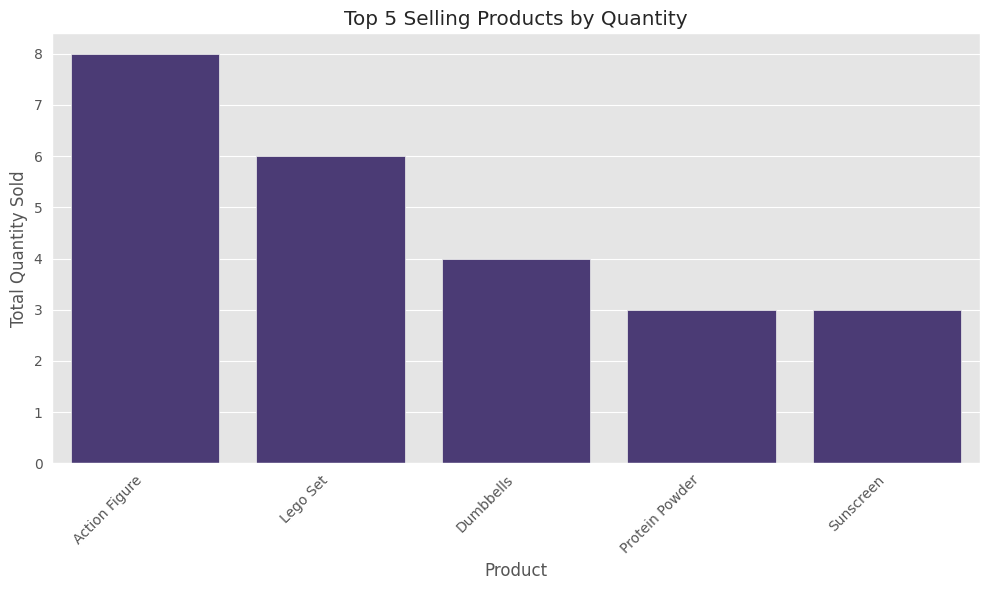

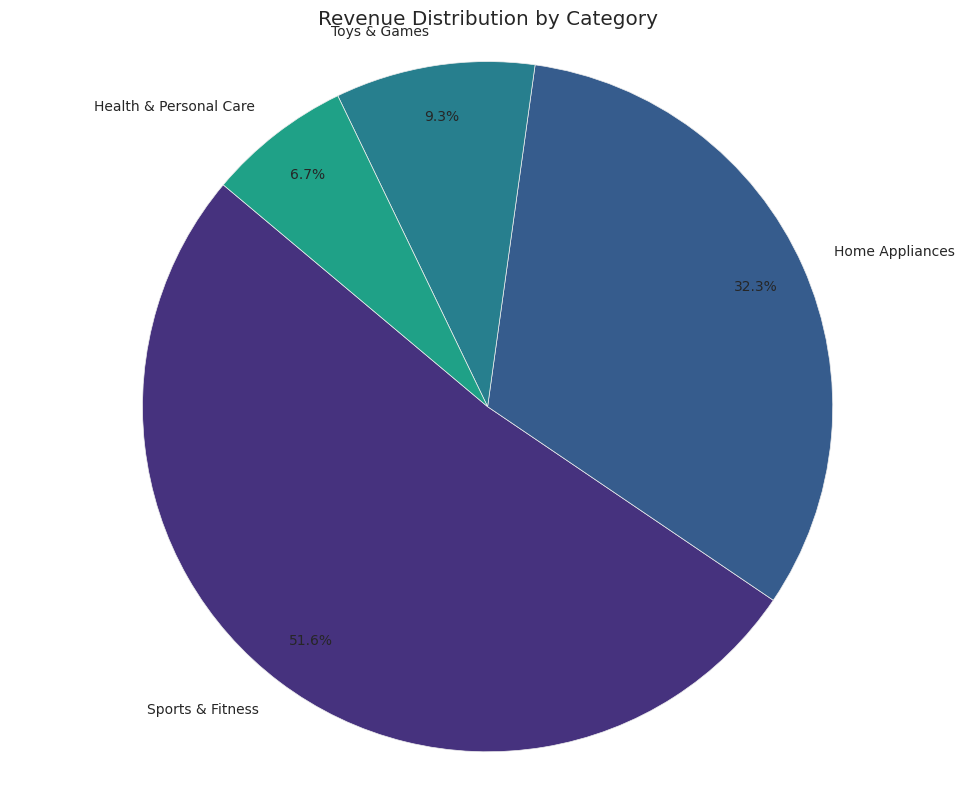

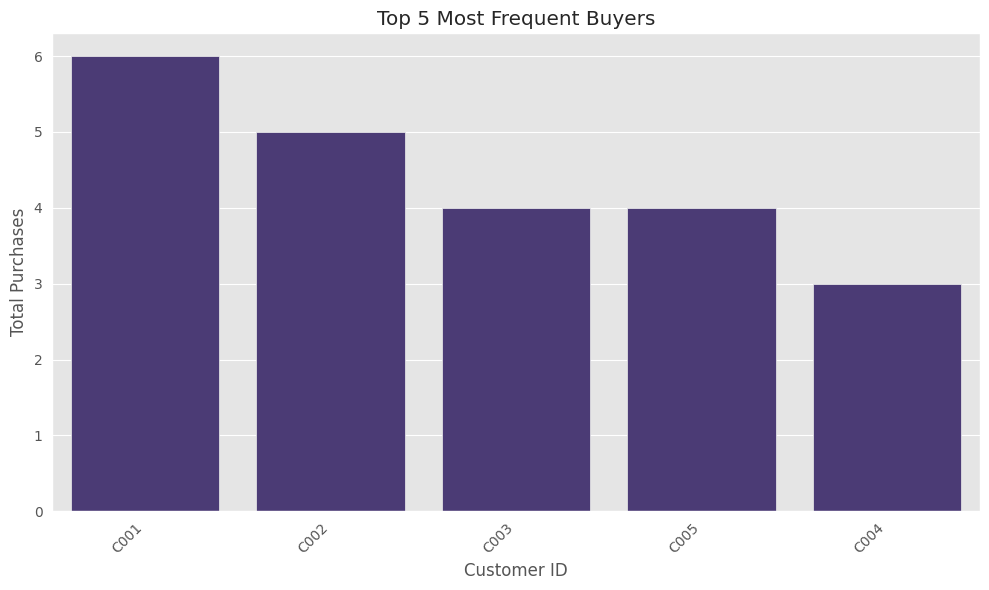

In [ ]:
# Cell 1: Setup and Data Loading
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset (using the alternative dataset provided previously)
data = {
    'TransactionID': [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
                      1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020,
                      1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030,
                      1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040,
                      1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050],
    'CustomerID': ['C001', 'C002', 'C003', 'C001', 'C004', 'C005', 'C002', 'C006', 'C007', 'C003',
                   'C008', 'C009', 'C001', 'C010', 'C005', 'C011', 'C002', 'C012', 'C004', 'C013',
                   'C001', 'C006', 'C014', 'C009', 'C015', 'C003', 'C002', 'C008', 'C016', 'C017',
                   'C005', 'C001', 'C018', 'C019', 'C002', 'C020', 'C004', 'C007', 'C011', 'C021',
                   'C001', 'C006', 'C010', 'C012', 'C003', 'C015', 'C005', 'C018', 'C022', 'C009'],
    'Product': ['Electric Toothbrush', 'Protein Powder', 'Board Game', 'Vitamins', 'Yoga Mat',
                'Action Figure', 'Dumbbells', 'Face Wash', 'Jigsaw Puzzle', 'Remote Control Car',
                'Treadmill', 'Sunscreen', 'Hair Dryer', 'Bicycle', 'Doll', 'Mouthwash',
                'Running Shorts', 'Shampoo', 'Resistance Bands', 'Lego Set',
                'Deodorant', 'Water Filter', 'Kitchen Mixer', 'Air Purifier', 'Robot Vacuum',
                'Action Figure', 'Running Shorts', 'Treadmill', 'Humidifier', 'Toaster Oven',
                'Board Game', 'Digital Scale', 'Dumbbells', 'Coffee Machine', 'Protein Powder',
                'Lego Set', 'Yoga Mat', 'Jigsaw Puzzle', 'Vitamins', 'Action Figure',
                'Electric Toothbrush', 'Face Wash', 'Bicycle', 'Shampoo', 'Remote Control Car',
                'Robot Vacuum', 'Action Figure', 'Dumbbells', 'Water Filter', 'Sunscreen'],
    'Category': ['Health & Personal Care', 'Sports & Fitness', 'Toys & Games', 'Health & Personal Care', 'Sports & Fitness',
                 'Toys & Games', 'Sports & Fitness', 'Health & Personal Care', 'Toys & Games', 'Toys & Games',
                 'Sports & Fitness', 'Health & Personal Care', 'Health & Personal Care', 'Sports & Fitness', 'Toys & Games',
                 'Health & Personal Care', 'Sports & Fitness', 'Health & Personal Care', 'Sports & Fitness', 'Toys & Games',
                 'Health & Personal Care', 'Home Appliances', 'Home Appliances', 'Home Appliances', 'Home Appliances',
                 'Toys & Games', 'Sports & Fitness', 'Sports & Fitness', 'Home Appliances', 'Home Appliances',
                 'Toys & Games', 'Health & Personal Care', 'Sports & Fitness', 'Home Appliances', 'Sports & Fitness',
                 'Toys & Games', 'Sports & Fitness', 'Toys & Games', 'Health & Personal Care', 'Toys & Games',
                 'Health & Personal Care', 'Health & Personal Care', 'Sports & Fitness', 'Health & Personal Care', 'Toys & Games',
                 'Home Appliances', 'Toys & Games', 'Sports & Fitness', 'Home Appliances', 'Health & Personal Care'],
    'Quantity': [1, 2, 1, 1, 1, 3, 1, 1, 1, 1,
                 1, 2, 1, 1, 2, 1, 1, 1, 3, 4,
                 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
                 1, 1, 1, 1, 1, 1, 2, 1, 1, 1],
    'Price': [4500, 2000, 1500, 900, 1200, 400, 3000, 600, 800, 2500,
              45000, 500, 2800, 15000, 700, 350, 1500, 400, 450, 2000,
              250, 3000, 6000, 12000, 25000, 400, 1500, 45000, 3500, 5000,
              1500, 1200, 3000, 8000, 2000, 2000, 1200, 800, 900, 400,
              4500, 600, 15000, 400, 2500, 25000, 400, 3000, 3000, 500],
    'Date': ['2023-01-05', '2023-01-05', '2023-01-06', '2023-01-06', '2023-01-07', '2023-01-07', '2023-01-08', '2023-01-08', '2023-01-09', '2023-01-09',
             '2023-01-10', '2023-01-10', '2023-01-11', '2023-01-11', '2023-01-12', '2023-01-12', '2023-01-13', '2023-01-13', '2023-01-14', '2023-01-14',
             '2023-01-15', '2023-01-15', '2023-01-16', '2023-01-16', '2023-01-17', '2023-01-17', '2023-01-18', '2023-01-18', '2023-01-19', '2023-01-19',
             '2023-01-20', '2023-01-20', '2023-01-21', '2023-01-21', '2023-01-22', '2023-01-22', '2023-01-23', '2023-01-23', '2023-01-24', '2023-01-24',
             '2023-01-25', '2023-01-25', '2023-01-26', '2023-01-26', '2023-01-27', '2023-01-27', '2023-01-28', '2023-01-28', '2023-01-29', '2023-01-29']
}
df = pd.DataFrame(data)

print("Original Dataset Head:")
print(df.head())

# Cell 2: Simulate the Map Phase

# 1. Product -> Quantity
# Map function: Takes a row, returns (product, quantity)
def map_product_quantity(row):
    return (row['Product'], row['Quantity'])

# Applying map to create a list of (product, quantity) pairs
mapped_products = [map_product_quantity(row) for index, row in df.iterrows()]
print("\n--- Map Phase Output (Products) ---")
print(mapped_products[:10]) # Displaying first 10 for brevity

# 2. Category -> Revenue (Quantity × Price)
# Map function: Takes a row, returns (category, revenue)
def map_category_revenue(row):
    return (row['Category'], row['Quantity'] * row['Price'])

# Applying map to create a list of (category, revenue) pairs
mapped_categories = [map_category_revenue(row) for index, row in df.iterrows()]
print("\n--- Map Phase Output (Categories) ---")
print(mapped_categories[:10]) # Displaying first 10 for brevity

# 3. CustomerID -> Frequency (for each purchase instance, emit 1)
# Map function: Takes a row, returns (customerID, 1)
def map_customer_frequency(row):
    return (row['CustomerID'], 1)

# Applying map to create a list of (customerID, 1) pairs
mapped_customers = [map_customer_frequency(row) for index, row in df.iterrows()]
print("\n--- Map Phase Output (Customers) ---")
print(mapped_customers[:10]) # Displaying first 10 for brevity


# Cell 3: Simulate the Reduce Phase

# 1. Reduce for Products (Sum Quantities)
# Grouping mapped products by key and summing values
reduced_products = {}
for product, quantity in mapped_products:
    reduced_products[product] = reduced_products.get(product, 0) + quantity
products_df = pd.DataFrame(reduced_products.items(), columns=['Product', 'TotalQuantity'])
products_df = products_df.sort_values(by='TotalQuantity', ascending=False)
print("\n--- Reduce Phase Output (Products: Total Quantity) ---")
print(products_df.head())

# 2. Reduce for Categories (Sum Revenues)
# Grouping mapped categories by key and summing values
reduced_categories = {}
for category, revenue in mapped_categories:
    reduced_categories[category] = reduced_categories.get(category, 0) + revenue
categories_df = pd.DataFrame(reduced_categories.items(), columns=['Category', 'TotalRevenue'])
categories_df = categories_df.sort_values(by='TotalRevenue', ascending=False)
print("\n--- Reduce Phase Output (Categories: Total Revenue) ---")
print(categories_df.head())

# 3. Reduce for Customers (Count Total Purchases)
# Grouping mapped customers by key and summing values (which are 1 for each purchase)
reduced_customers = {}
for customer, freq in mapped_customers:
    reduced_customers[customer] = reduced_customers.get(customer, 0) + freq
customers_df = pd.DataFrame(reduced_customers.items(), columns=['CustomerID', 'TotalPurchases'])
customers_df = customers_df.sort_values(by='TotalPurchases', ascending=False)
print("\n--- Reduce Phase Output (Customers: Total Purchases) ---")
print(customers_df.head())


# Cell 4: Visual Representation (Charts)

# Set a style for the plots
plt.style.use('ggplot')
sns.set_palette('viridis') # A nice color palette

# 1. Bar chart of top 5 products by quantity sold
plt.figure(figsize=(10, 6))
sns.barplot(x='Product', y='TotalQuantity', data=products_df.head(5))
plt.title('Top 5 Selling Products by Quantity')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Pie chart of revenue by category
plt.figure(figsize=(10, 8))
# Ensure the sum of revenues is not zero to avoid division by zero error
if categories_df['TotalRevenue'].sum() > 0:
    plt.pie(categories_df['TotalRevenue'], labels=categories_df['Category'],
            autopct='%1.1f%%', startangle=140, pctdistance=0.85)
else:
    print("No revenue data to plot for categories.")
plt.title('Revenue Distribution by Category')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

# 3. Bar chart of top 5 customers by frequency
plt.figure(figsize=(10, 6))
sns.barplot(x='CustomerID', y='TotalPurchases', data=customers_df.head(5))
plt.title('Top 5 Most Frequent Buyers')
plt.xlabel('Customer ID')
plt.ylabel('Total Purchases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()